## Spam Mail Prediction using Machine Learning with Python

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
spam = pd.read_csv('Data/mail_data.csv')

In [3]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
spam.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
spam.shape

(5572, 2)

In [6]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
spam.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
spam.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
'''
do some data analysis
'''
spam['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [10]:
spam['Category'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Category, dtype: float64

<AxesSubplot:>

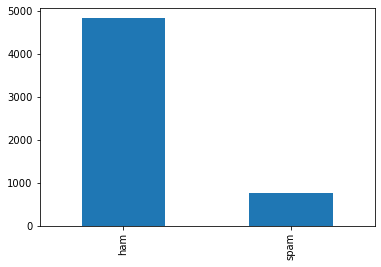

In [11]:
spam['Category'].value_counts().plot.bar()

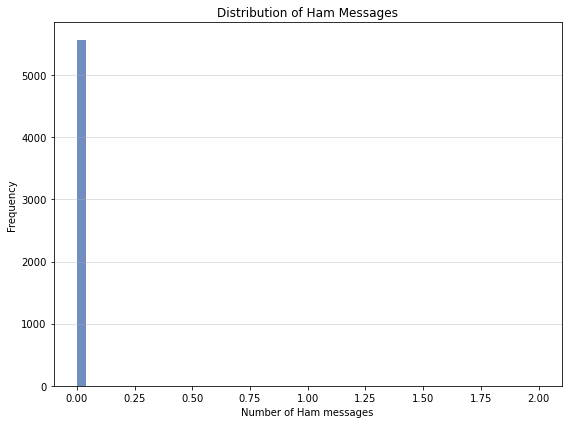

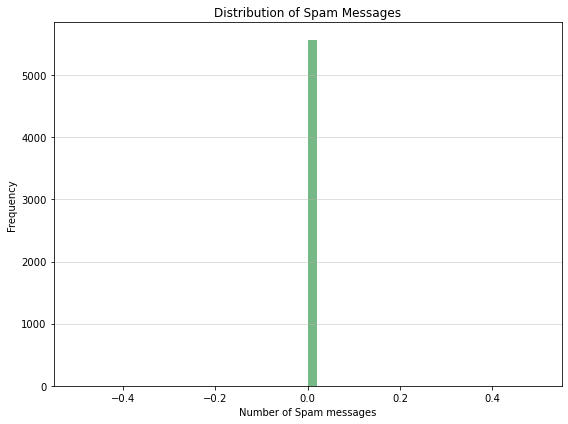

In [12]:
# Calculate ham and spam counts
import matplotlib.pyplot as plt
spam['ham_count'] = spam['Message'].str.count('\n')
spam['spam_count'] = spam['Message'].str.count('Spam')

# Plot histogram for ham messages
plt.figure(figsize=(8, 6))
plt.hist(spam['ham_count'], bins=50, color='#4c72b0', alpha=0.8)
plt.xlabel('Number of Ham messages')
plt.ylabel('Frequency')
plt.title('Distribution of Ham Messages')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot histogram for spam messages
plt.figure(figsize=(8, 6))
plt.hist(spam['spam_count'], bins=50, color='#55a868', alpha=0.8)
plt.xlabel('Number of Spam messages')
plt.ylabel('Frequency')
plt.title('Distribution of Spam Messages')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

In [13]:
spam.describe()

,ham_count,spam_count
count,5572.000000,5572.0
mean,0.000359,0.0
std,0.026793,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,0.000000,0.0
max,2.000000,0.0


In [14]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5572 non-null   object
 1   Message     5572 non-null   object
 2   ham_count   5572 non-null   int64 
 3   spam_count  5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [15]:
# label spam mail as 0;  ham mail as 1;
spam.loc[spam['Category']=='spam', 'Category'] = 0
spam.loc[spam['Category']=='ham', 'Category'] = 1

In [16]:
spam.head()

,Category,Message,ham_count,spam_count
0,1,"Go until jurong point, crazy.. Available only ...",0,0
1,1,Ok lar... Joking wif u oni...,0,0
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,0,0
3,1,U dun say so early hor... U c already then say...,0,0
4,1,"Nah I don't think he goes to usf, he lives aro...",0,0


In [17]:
X =  spam['Message']
y =  spam['Category']

In [18]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [19]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [20]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

In [35]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Data
data = [
    ('ham', "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."),
    ('ham', "Ok lar... Joking wif u oni..."),
    ('spam', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"),
    ('ham', "U dun say so early hor... U c already then say..."),
    ('ham', "Nah I don't think he goes to usf, he lives around here though"),
    ('spam', "URGENT! You have won a 7-day all-expenses-paid trip. Reply WIN to claim."),
    ('ham', "What's up? Are you free for a movie tonight?"),
    ('spam', "Congratulations! You've been selected for a cash prize. Reply CLAIM to receive details."),
    ('ham', "I'm running late. Will be there in 10 minutes."),
    ('spam', "Get a new iPhone for free! Limited stock. Reply NOW to get yours."),
    ('spam', "Hey there! We noticed you haven't responded to our previous offer. Reply NOW to claim your discount."),
    ('ham', "Just finished watching the movie. It was great!")
]

# Separate data into messages and labels
messages, labels = zip(*data)

# Text preprocessing
translator = str.maketrans('', '', string.punctuation)

messages = [text.lower().translate(translator) for text in messages]

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(messages)
y = list(labels)

# Train the model
clf = LogisticRegression()
clf.fit(X, y)

# Classify all emails
all_emails = [
    "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
    "Ok lar... Joking wif u oni...",
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
    "U dun say so early hor... U c already then say...",
    "Nah I don't think he goes to usf, he lives around here though",
    "URGENT! You have won a 7-day all-expenses-paid trip. Reply WIN to claim.",
    "What's up? Are you free for a movie tonight?",
    "Congratulations! You've been selected for a cash prize. Reply CLAIM to receive details.",
    "I'm running late. Will be there in 10 minutes.",
    "Get a new iPhone for free! Limited stock. Reply NOW to get yours.",
    "Hey there! We noticed you haven't responded to our previous offer. Reply NOW to claim your discount.",
    "Just finished watching the movie. It was great!"
]

all_emails = [email.lower().translate(translator) for email in all_emails]
all_emails_vectorized = vectorizer.transform(all_emails)
predictions = clf.predict(all_emails_vectorized)

# Display email classifications
for email, prediction in zip(all_emails, predictions):
    if prediction == 'spam':
        label = '\033[31mSpam\033[0m'  # Red color for spam
    else:
        label = 'Ham'
    print(f"The email '{email}' is classified as: \033[31m{label}\033[0m")

The email 'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat' is classified as: Ham
The email 'ok lar joking wif u oni' is classified as: Ham
The email 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s' is classified as: Ham
The email 'u dun say so early hor u c already then say' is classified as: Ham
The email 'nah i dont think he goes to usf he lives around here though' is classified as: Ham
The email 'urgent you have won a 7day allexpensespaid trip reply win to claim' is classified as: Ham
The email 'whats up are you free for a movie tonight' is classified as: Ham
The email 'congratulations youve been selected for a cash prize reply claim to receive details' is classified as: Ham
The email 'im running late will be there in 10 minutes' is classified as: Ham
The email 'get a new iphone for free limited stock reply now to get yours' i